# Clustering on Risk Groups for Car Insurance Premiums

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../data/car_insurance.csv")

df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [3]:
# Fit data 

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

## K-Means

Assign Kmeans values to the df

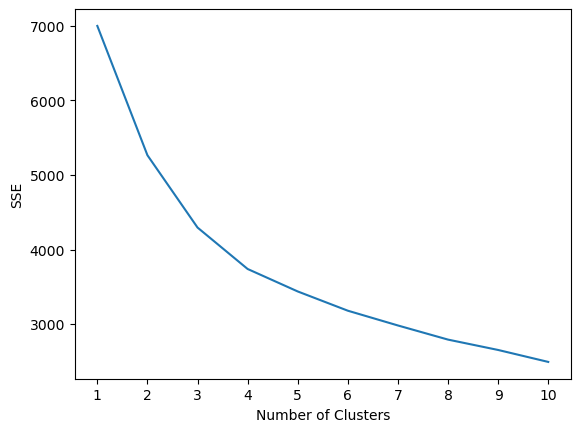

In [4]:
# Elbow plot

# Init kmeans parameters

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}

# List to hold sum of squared error for each K

sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot results

plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Bend at either 3 or 4, will try both as optimal K's when clustering.

In [5]:
# Perform K-Means with optimal K(s)

k = 4   # Change the K on the fly

#instantiate the k-means class, using optimal clusters
kmeans = KMeans(init='random', n_clusters=k, n_init=10, random_state=1)

# fit k-means algo to data
kmeans.fit(scaled_df)

# view clusters assignment for each ovbs
kmeans.labels_

array([1, 2, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 0, 0, 1, 2, 3,
       0, 0, 1, 0, 0, 2, 3, 1, 1, 1, 0, 3, 2, 2, 0, 1, 3, 0, 0, 1, 3, 3,
       0, 0, 0, 2, 0, 1, 2, 2, 3, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 3,
       1, 0, 3, 2, 1, 3, 2, 3, 2, 1, 3, 0, 0, 0, 1, 2, 3, 1, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 1, 0, 1, 3, 0, 2, 3, 1, 0, 2, 0, 0, 0, 1, 2, 2, 3,
       2, 1, 1, 1, 3, 0, 0, 3, 3, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 1,
       1, 2, 0, 3, 3, 3, 2, 0, 1, 2, 3, 0, 3, 0, 2, 3, 3, 1, 0, 0, 1, 1,
       1, 2, 2, 3, 1, 2, 1, 0, 2, 3, 0, 1, 3, 0, 2, 3, 1, 1, 2, 1, 3, 1,
       0, 2, 2, 2, 1, 3, 0, 0, 2, 0, 2, 3, 3, 2, 0, 0, 2, 2, 1, 1, 0, 2,
       0, 0, 1, 3, 1, 0, 3, 2, 0, 3, 0, 2, 0, 1, 1, 2, 3, 0, 0, 2, 2, 0,
       3, 1, 3, 0, 0, 0, 2, 3, 1, 3, 0, 0, 2, 3, 3, 3, 3, 3, 0, 0, 2, 1,
       3, 1, 0, 2, 3, 0, 0, 1, 1, 2, 1, 0, 1, 3, 0, 2, 1, 0, 1, 0, 2, 2,
       3, 3, 0, 1, 3, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 3, 0, 3, 1, 3,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2, 3,

In [6]:
# append cluster assingment to og df
df['cluster'] = kmeans.labels_

kmeans_clustered_df = df

# show new df with clusterm collumn
kmeans_clustered_df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),cluster
0,56,32,4,17,2002,23,488.35,1
1,46,19,0,21,2025,0,486.15,2
2,32,11,4,15,2020,5,497.55,0
3,60,0,4,19,1991,34,498.35,3
4,25,7,0,13,2005,20,495.55,3


## K-Nearest Neighbour Regression

Assign K-NN values to the df

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_df = pd.read_csv("../data/car_insurance.csv")

knn_df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


In [8]:
# assign, scale and train test split

# Assign features and target
X = knn_df.drop('Insurance Premium ($)', axis=1)
y = knn_df['Insurance Premium ($)']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split into train and test using random split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

In [9]:
# Fit k-NN model and evaluate

# Train a k-NN Regressor
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)



# Predict and evaluate
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (k=5): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error (k=5): 1.35
R-squared: 0.96


# Plots for both KNN and K-Means

## KNN Regression

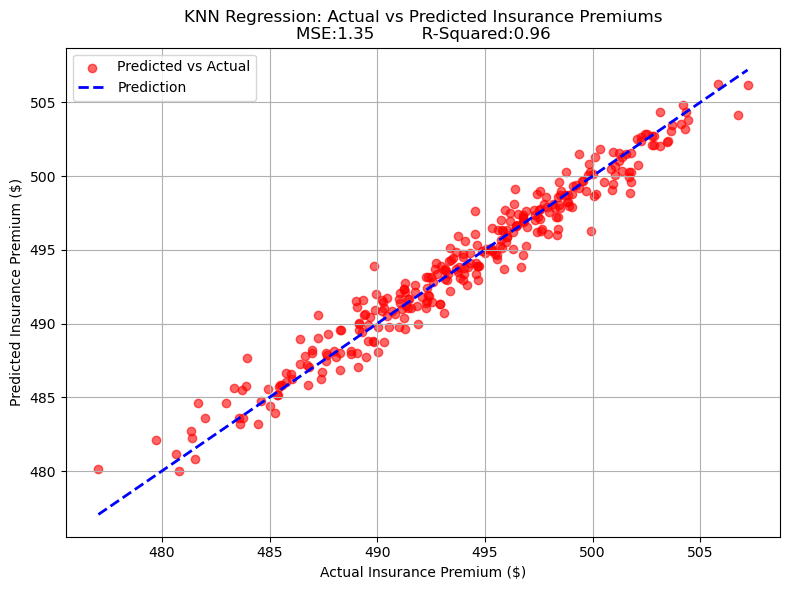

In [10]:
# Plot KNN regressor results

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2, label='Prediction')
plt.title(f'KNN Regression: Actual vs Predicted Insurance Premiums\nMSE:{mse:.2f}         R-Squared:{r2:.2f}')

plt.xlabel('Actual Insurance Premium ($)')
plt.ylabel('Predicted Insurance Premium ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




## K Means - Not Used

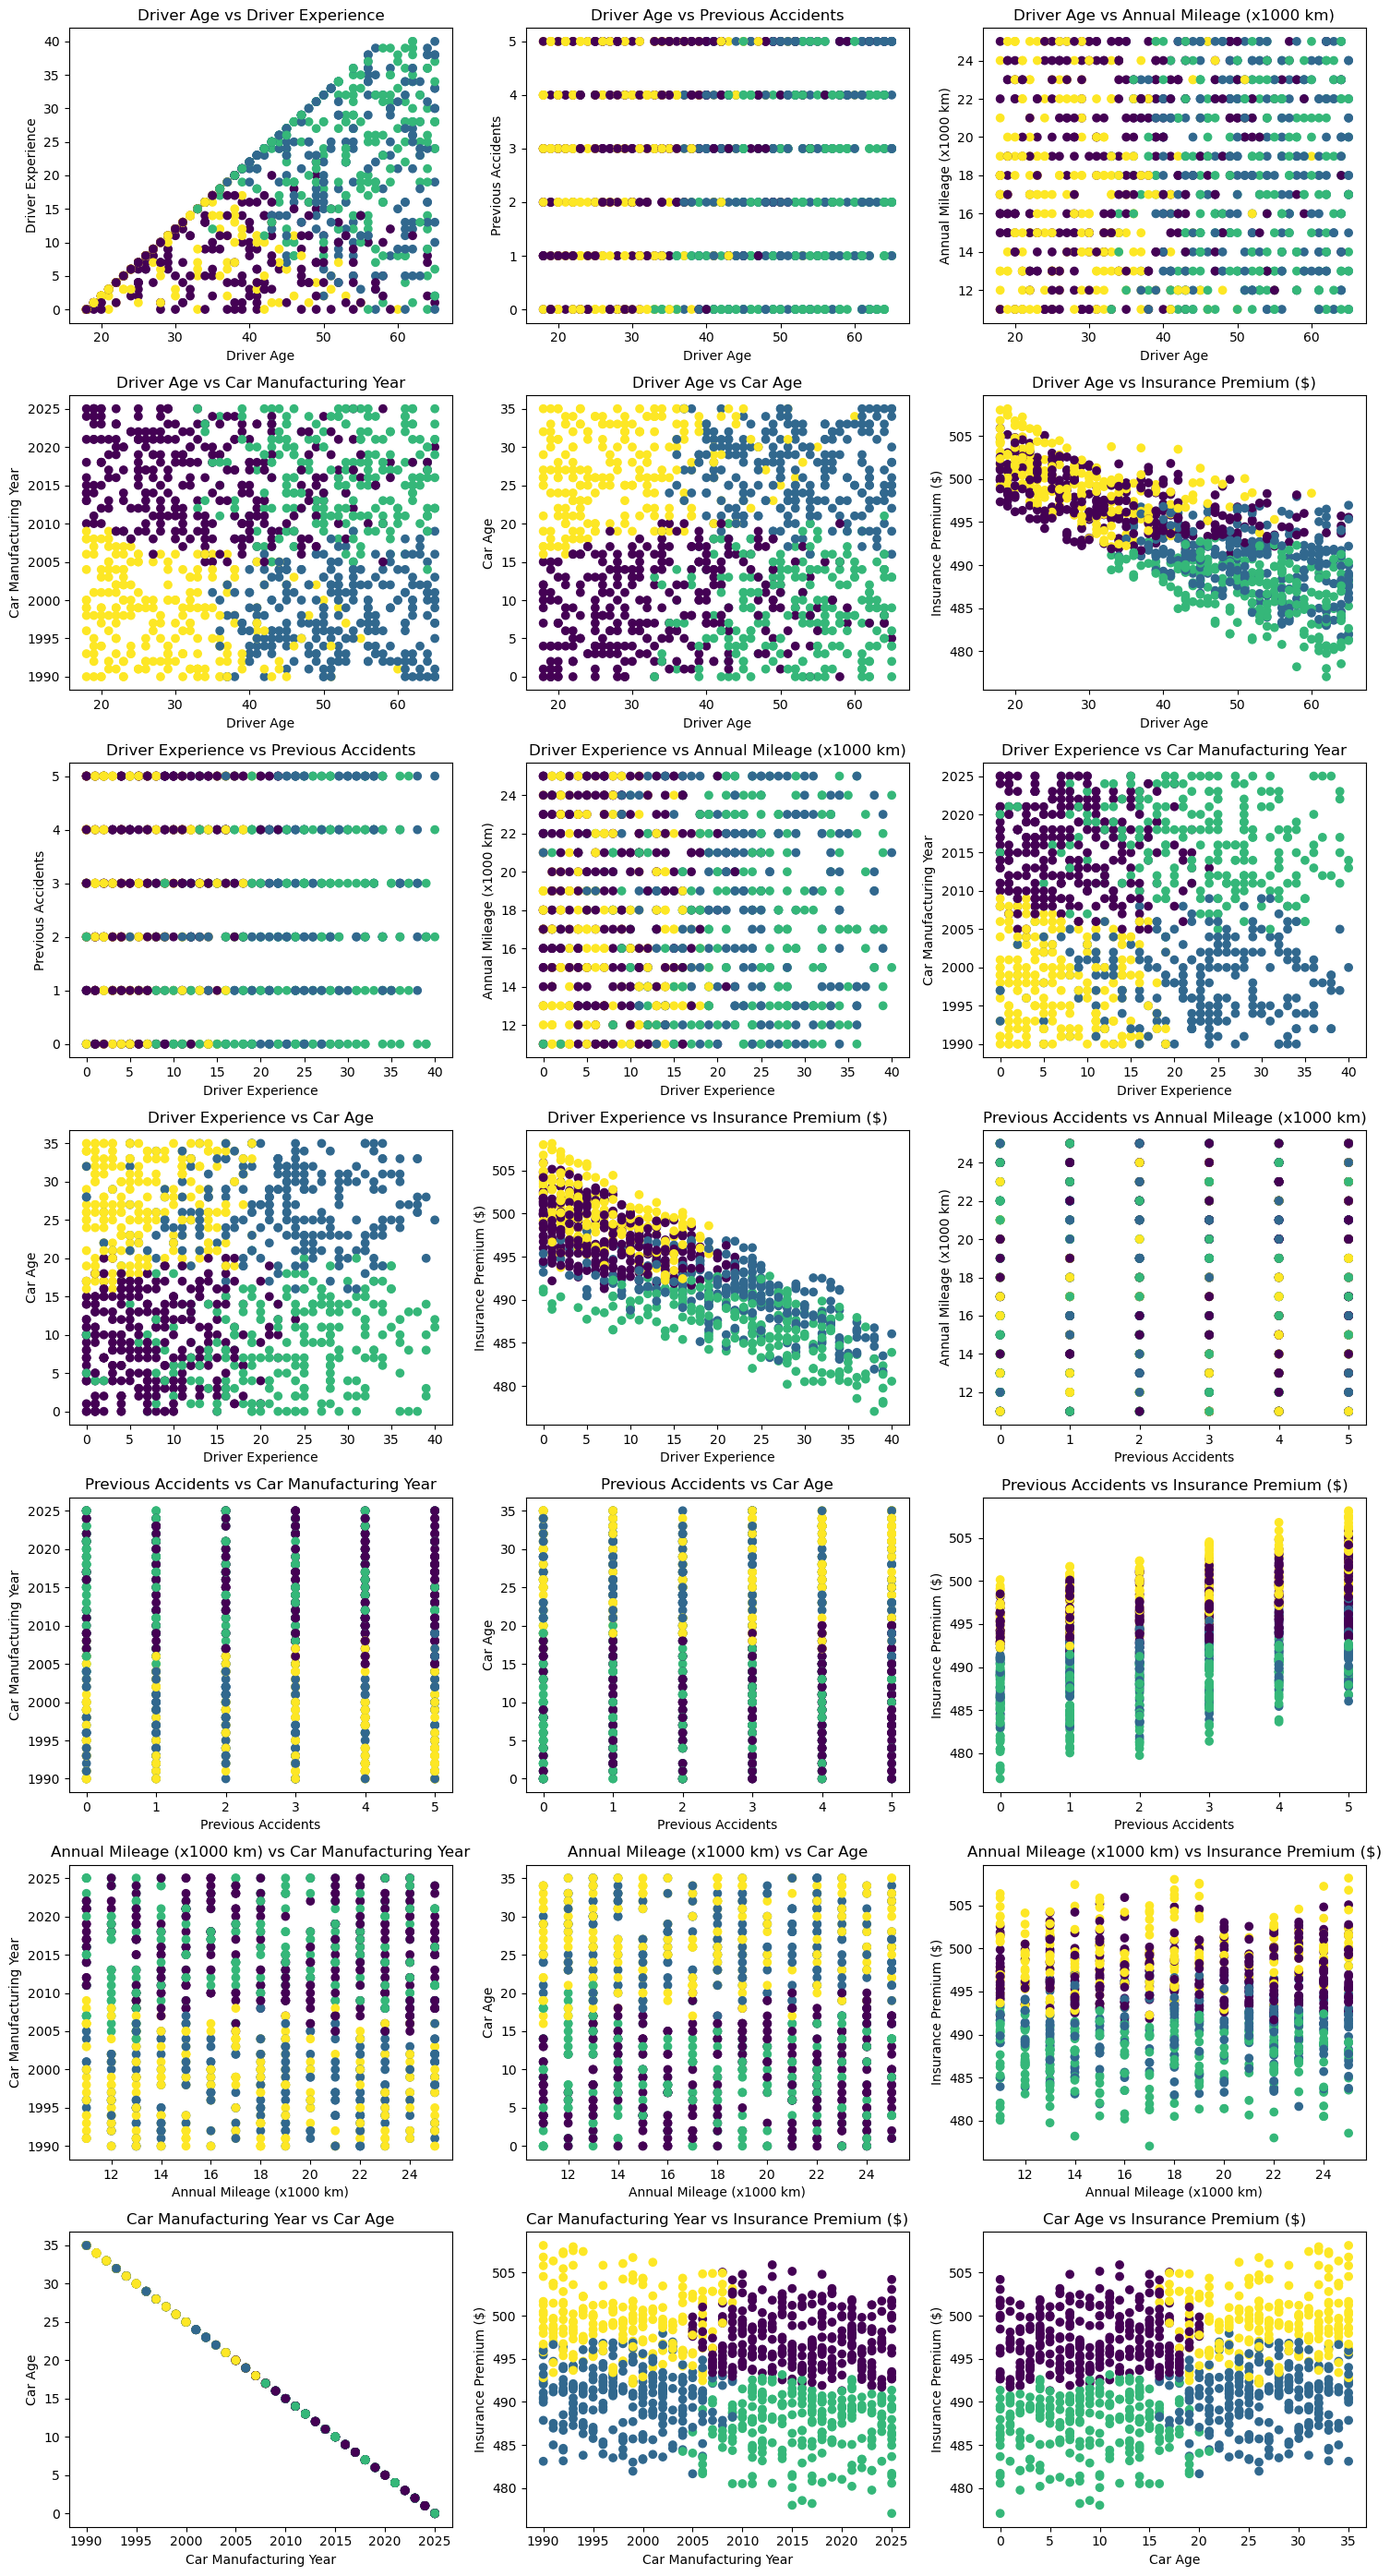

In [11]:
# Plot all K-Means combos
from itertools import combinations

# Get numeric columns excluding 'cluster'
features = kmeans_clustered_df.select_dtypes(include='number').drop(columns='cluster').columns

# Generate all unique pairs of features
feature_pairs = list(combinations(features, 2))

# Set up subplots
n = len(feature_pairs)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot each pair
for i, (x, y) in enumerate(feature_pairs):
    axes[i].scatter(kmeans_clustered_df[x], kmeans_clustered_df[y], c=kmeans_clustered_df['cluster'])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)
    axes[i].set_title(f'{x} vs {y}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

